In [12]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [13]:
model = KMeans(n_clusters=3, random_state=100)

In [14]:
def make_data(n, seed):
    np.random.seed(seed)
    shift_matrix = np.array([[3,3], [6,9], [9,3]])
    data = np.random.randn(3,2,n) + shift_matrix.reshape((3,2,1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])
    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]}, columns=['x', 'y'])
    df = df.sample(frac=1.0)
    return df

In [27]:
make_data(2, 42)

,x,y
2,115.316933,5.289606
5,190.851201,1.267135
0,69.934283,1.823844
4,170.610512,1.268291
1,57.234714,2.261515
3,115.317261,4.883717


In [33]:
train = make_data(10, 42)
test = make_data(10, 27)

Text(0.5, 1.0, 'Train')

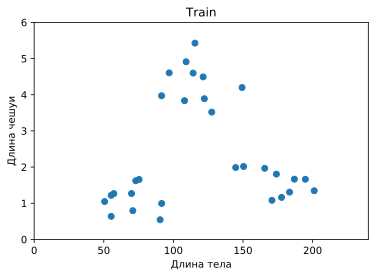

In [34]:
plt.scatter(train['x'], train['y'])
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
train_scaled = scaler.fit_transform(train)
train_scaled = pd.DataFrame(train_scaled, columns=['x', 'y'])

Text(0.5, 1.0, 'Train')

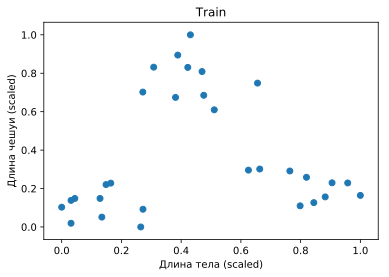

In [38]:
plt.scatter(train_scaled['x'], train_scaled['y'])
plt.xlabel('Длина тела (scaled)')
plt.ylabel('Длина чешуи (scaled)')
plt.title('Train')

In [39]:
train_labels = model.fit_predict(train_scaled)

In [40]:
train_labels

array([2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0,
       1, 1, 2, 2, 2, 0, 1, 1])

In [41]:
model.cluster_centers_

array([[0.4314873 , 0.77857028],
       [0.12190576, 0.11495728],
       [0.82595794, 0.21634417]])

In [42]:
centers = scaler.inverse_transform(model.cluster_centers_)
centers

array([[115.56312871,   4.34494667],
       [ 68.96122223,   1.10467088],
       [174.94355655,   1.59972071]])

Text(0.5, 1.0, 'Train')

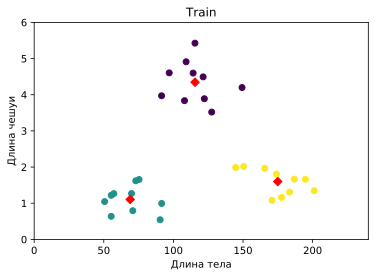

In [43]:
plt.scatter(train['x'], train['y'], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')

In [44]:
model.inertia_

0.5417377477488047

In [45]:
inertia_arr = []
for i in range(2, 10):
    temp_model = KMeans(n_clusters=i, random_state=100)
    temp_model.fit(train_scaled)
    temp_inertia = temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)

2.900264163209545
0.5417377477488047
0.428173689117485
0.32586599155679713
0.26736166193637667
0.20725794455977647
0.1677417222340906
0.14671272476076844


Text(0.5, 1.0, 'Inertia')

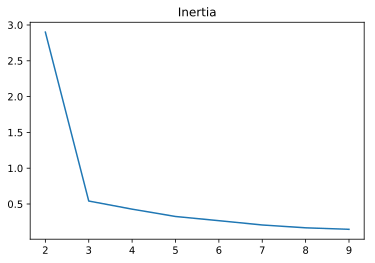

In [46]:
plt.plot([i for i in range(2, 10)], inertia_arr)
plt.title('Inertia')

In [47]:
test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled, columns=['x', 'y'])

In [48]:
test_labels = model.predict(test_scaled)

In [49]:
test_labels

array([1, 2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1,
       2, 2, 1, 0, 0, 1, 0, 2])

Text(0.5, 1.0, 'Test')

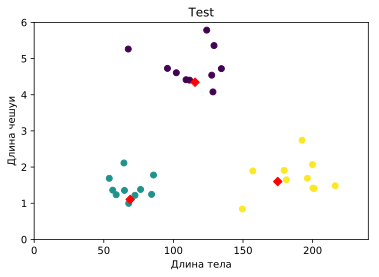

In [50]:
plt.scatter(test['x'], test['y'], c=test_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Test')

**agglomerative clustering**

In [51]:
from sklearn.cluster import AgglomerativeClustering

In [52]:
model = AgglomerativeClustering(n_clusters=3)

In [53]:
train_labels = model.fit_predict(train_scaled)

In [54]:
train_labels

array([0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2,
       1, 1, 0, 0, 0, 2, 1, 1], dtype=int64)

Text(0.5, 1.0, 'Train')

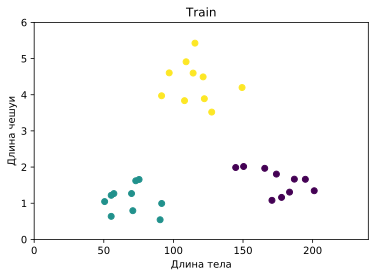

In [55]:
plt.scatter(train['x'], train['y'], c=train_labels)
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn = KNeighborsClassifier(n_neighbors=5)

In [58]:
knn.fit(train_scaled, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [63]:
test_labels = knn.predict(test_scaled)

In [64]:
test_labels

array([1, 0, 1, 0, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1,
       0, 0, 1, 2, 2, 1, 2, 0], dtype=int64)

Text(0.5, 1.0, 'Test')

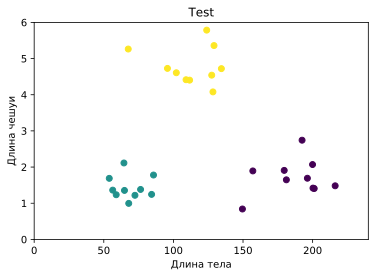

In [72]:
plt.scatter(test['x'], test['y'], c=test_labels)
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Test')

In [73]:
plt.style.use('fivethirtyeight')

**PCA - Principal Component Analysis (Метод главных компонент)**

Перед применением метода главных компонент все признаки должны быть приведены к сходному масштабу. Это может быть сделано с помощью стандартизации или нормализации

In [74]:
houses = np.array([[5, 1.6], [4, 1.4], [6, 1.9], [3, 1.1], [4, 1.25]])

Text(0, 0.5, 'Площадь дома')

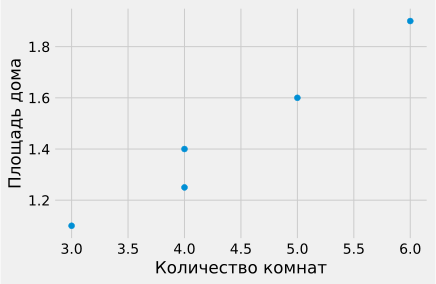

In [75]:
plt.scatter(houses[:, 0], houses[:, 1])
plt.xlabel('Количество комнат')
plt.ylabel('Площадь дома')

In [76]:
houses

array([[5.  , 1.6 ],
       [4.  , 1.4 ],
       [6.  , 1.9 ],
       [3.  , 1.1 ],
       [4.  , 1.25]])

In [77]:
mean_values = np.mean(houses, axis=0)
mean_values

array([4.4 , 1.45])

In [78]:
houses_centered = houses - mean_values
houses_centered

array([[ 0.6 ,  0.15],
       [-0.4 , -0.05],
       [ 1.6 ,  0.45],
       [-1.4 , -0.35],
       [-0.4 , -0.2 ]])

In [81]:
tst_mean = np.mean(houses_centered, axis=0)
tst_mean
#практически равны нулю

array([-3.55271368e-16,  4.44089210e-17])

In [82]:
covarience_matrix = np.cov(houses_centered.T)
covarience_matrix

array([[1.3   , 0.35  ],
       [0.35  , 0.0975]])

In [83]:
np.var(houses_centered[:, 0], ddof=1)

1.3

In [84]:
np.var(houses_centered[:, 1], ddof=1)

0.09749999999999998

In [85]:
eigenvalues, eigenvectors = np.linalg.eig(covarience_matrix)

In [86]:
eigenvalues

array([1.39445221, 0.00304779])

In [87]:
eigenvectors

array([[ 0.96546225, -0.26054298],
       [ 0.26054298,  0.96546225]])

Собственные значения eigenvalues сильно отличаются, - eigenvalues[0] намного больше чем eigenvalues[1], поэтому оставим только собственный вектор из столбца 0 массива eigenvectors, то есть eigenvectors[:, 0].
Умножим центрированные данные на этот вектор

In [88]:
result_pre = np.dot(houses_centered, eigenvectors[:, 0])
result = result_pre.reshape(-1, 1)
result

array([[ 0.6183588 ],
       [-0.39921205],
       [ 1.66198394],
       [-1.44283719],
       [-0.4382935 ]])

In [89]:
from sklearn.decomposition import PCA

In [90]:
pca = PCA(n_components=1)

In [91]:
mc = pca.fit_transform(houses)
mc

array([[ 0.6183588 ],
       [-0.39921205],
       [ 1.66198394],
       [-1.44283719],
       [-0.4382935 ]])

In [92]:
pca.explained_variance_ratio_

array([0.99781911])

In [102]:
X_train = pd.read_pickle('X_train.pkl')
y_train = pd.read_pickle('y_train.pkl')

In [103]:
X_valid = pd.read_pickle('X_valid.pkl')
y_valid = pd.read_pickle('y_valid.pkl')

In [104]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 299 to 103
Data columns (total 11 columns):
Sex           668 non-null int32
Age           668 non-null float64
SibSp         668 non-null int64
Parch         668 non-null int64
Fare          668 non-null float64
Embarked_C    668 non-null uint8
Embarked_Q    668 non-null uint8
Embarked_S    668 non-null uint8
Pclass_1      668 non-null uint8
Pclass_2      668 non-null uint8
Pclass_3      668 non-null uint8
dtypes: float64(2), int32(1), int64(2), uint8(6)
memory usage: 32.6 KB


In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
scaler = StandardScaler(with_mean=False)

In [107]:
X_train_scaled = scaler.fit_transform(X_train)

C:\Users\pomaz\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pomaz\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [110]:
X_valid_scaled = scaler.transform(X_valid)

C:\Users\pomaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [111]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=X_train.columns)

In [112]:
pca = PCA(random_state=100)

In [113]:
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='auto', tol=0.0, whiten=False)

In [114]:
pca.explained_variance_ratio_

array([2.22480052e-01, 1.80579178e-01, 1.61196472e-01, 1.18874068e-01,
       9.43088132e-02, 7.61203186e-02, 6.30288483e-02, 4.72728880e-02,
       3.61393615e-02, 1.54354184e-32, 1.46452046e-33])

In [123]:
np.sum(pca.explained_variance_ratio_[:7])

0.916587750440676

In [124]:
pca = PCA(n_components=7, random_state=100)

In [125]:
X_train_mc = pca.fit_transform(X_train_scaled)

In [126]:
X_valid_mc = pca.transform(X_valid_scaled)

In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
lr = LogisticRegression()

In [130]:
lr.fit(X_train_mc, y_train)

C:\Users\pomaz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [131]:
y_pred = lr.predict(X_valid_mc)

In [132]:
from sklearn.metrics import accuracy_score

In [133]:
accuracy_score(y_valid, y_pred)

0.8026905829596412

In [134]:
from sklearn.model_selection import train_test_split

**t-SNE**

In [135]:
from sklearn.manifold import TSNE

In [136]:
from sklearn.datasets import load_boston

In [137]:
boston = load_boston()

In [138]:
for line in boston.DESCR.split("\n"):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [158]:
data = boston.data

In [159]:
feature_names = boston.feature_names

In [160]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [161]:
X = pd.DataFrame(data, columns=feature_names)

In [162]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [163]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [164]:
price = boston.target

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.3, random_state=7)

In [166]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [167]:
from sklearn.preprocessing import StandardScaler

In [168]:
scaler = StandardScaler()

In [169]:
X_train_scaled = scaler.fit_transform(X_train)

In [170]:
X_test_scaled = scaler.transform(X_test)

In [171]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [172]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [173]:
tsne = TSNE(n_components=2, learning_rate=150, random_state=100)

In [174]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [175]:
X_train_tsne

array([[ 2.32721748e+01, -1.29761276e+01],
       [ 5.66452074e+00, -9.14180088e+00],
       [ 3.23880920e+01, -2.02278404e+01],
       [ 3.36158714e+01, -1.95752373e+01],
       [ 2.49848042e+01, -1.43119011e+01],
       [-1.14220476e+01, -4.93835449e+00],
       [-1.08809719e+01, -7.36843634e+00],
       [-7.67562103e+00,  9.10884666e+00],
       [-1.31940622e+01,  1.58333130e+01],
       [ 2.34953785e+01, -2.30524616e+01],
       [-1.22125463e+01,  1.14928999e+01],
       [ 2.20403671e+01, -1.26745787e+01],
       [-4.87584686e+00,  1.58501625e+00],
       [-1.57361660e+01,  1.52322922e+01],
       [ 3.23476906e+01, -2.13490429e+01],
       [-1.53806705e+01,  1.93265228e+01],
       [-1.27268724e+01,  6.80443478e+00],
       [ 3.20102234e+01, -2.19157391e+01],
       [-1.18157578e+01,  1.56995497e+01],
       [ 2.37995319e+01, -1.70898056e+01],
       [ 3.60807419e+00, -8.96491337e+00],
       [-1.64206486e+01,  2.96712112e+00],
       [-1.40932856e+01,  1.35224714e+01],
       [-1.

In [176]:
X_train_tsne.shape

(354, 2)

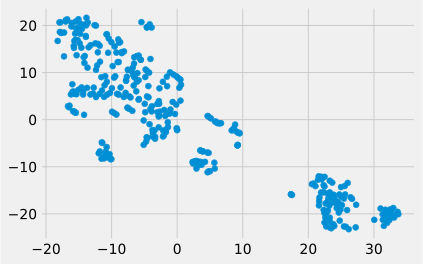

In [177]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

In [188]:
from sklearn.cluster import KMeans

In [189]:
kmeans = KMeans(n_clusters=2)

In [190]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [191]:
labels_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,

In [192]:
pd.value_counts(labels_train)

1    232
0    122
dtype: int64

In [193]:
labels_test = kmeans.predict(X_test_scaled)

In [194]:
labels_test

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0])

Text(25, -7, 'Кластер 1')

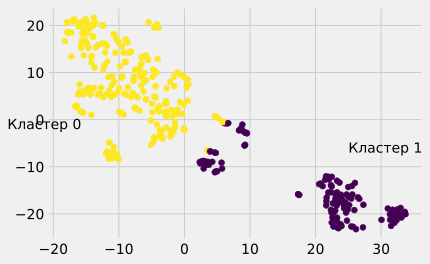

In [195]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.text(-27, -2, 'Кластер 0')
plt.text(25, -7, 'Кластер 1')

In [196]:
y_train.mean()

22.595762711864406

In [197]:
y_train[labels_train == 0].mean()

16.227868852459018

In [198]:
y_train[labels_train == 1].mean()

25.94439655172414

Text(0.5, 0, 'Цена')

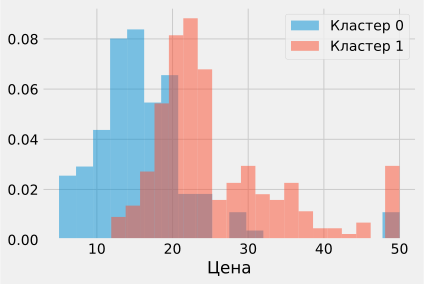

In [199]:
plt.hist(y_train[labels_train==0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train==1], bins=20, density=True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('Цена')

In [200]:
X_train.loc[labels_train==0, 'RM'].mean()

5.909286885245898

In [201]:
X_train.loc[labels_train==1, 'RM'].mean()

6.448517241379314

In [202]:
X_train.loc[labels_train==0, 'CRIM'].mean()

9.05679418032787

In [203]:
X_train.loc[labels_train==1, 'CRIM'].mean()

0.26798159482758627

Text(0.5, 0, 'CRIM (per capita crime rate by town)')

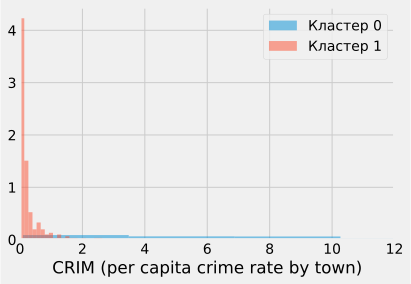

In [204]:
plt.hist(X_train.loc[labels_train==0, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train==1, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.xlim(0,12)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('CRIM (per capita crime rate by town)')

Text(0.5, 0, 'NOX\nnitric oxides concentration (parts per 10 million)')

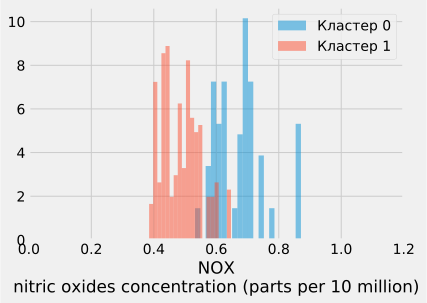

In [206]:
plt.hist(X_train.loc[labels_train==0, 'NOX'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train==1, 'NOX'], bins=20, density=True, alpha=0.5)
plt.xlim(0,1.2)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('NOX\nnitric oxides concentration (parts per 10 million)')

In [207]:
from sklearn.linear_model import LinearRegression

In [208]:
lr = LinearRegression()

In [209]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [210]:
y_test_pred = lr.predict(X_test_scaled)

In [211]:
from sklearn.metrics import r2_score

In [212]:
r2_score(y_test, y_test_pred)

0.6508417720329545

In [213]:
lr.fit(X_train_scaled.loc[labels_train==0, :], y_train[labels_train==0])
y_test_pred_0 = lr.predict(X_test_scaled.loc[labels_test==0, :])
r2_score(y_test[labels_test==0], y_test_pred_0)

0.6458127429551195

In [214]:
lr.fit(X_train_scaled.loc[labels_train==1, :], y_train[labels_train==1])
y_test_pred_1 = lr.predict(X_test_scaled.loc[labels_test==1, :])
r2_score(y_test[labels_test==1], y_test_pred_1)

0.831603433529844

In [215]:
y_test_all = np.hstack([y_test[labels_test==0], y_test[labels_test==1]])

In [216]:
y_test_pred_all = np.hstack([y_test_pred_0, y_test_pred_1])

In [217]:
r2_score(y_test_all, y_test_pred_all)

0.8055877528812476